In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# Load package 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import Exercise_1 as ex1

<h1> Exercise 2: The Infinite Horizon Consumption Model

Consider again the simplest consumption-saving model but with an infinite time horizon:

$$\begin{align*}
    V_1^*(W_1) &= \max_{c_1,c_2,\dots} \{ \sqrt{c_1} +\beta \sqrt{c_2}+\beta^2\sqrt{c_3}+\cdots \} \\
    & \text{s.t.} \\
    W_{t+1} & = W_{t}-c_{t} \\
    c_{t} & \leq  W_{t} , \,\forall t\\
    c_{t} & \in  \mathbb{R}_+, \,\forall t
\end{align*}$$
for $\beta =0.9$ and $W_1=5$.



Notice, we can rewrite the first equation as a Bellman equation:

$$\begin{aligned}
    V^*(W_t) &=\sqrt{c_t} +\beta V^*(\underbrace{W_{t}-c_t}_{W_{t+1}}), \forall t
\end{aligned}$$


### 1. Solve the model using value function iteration (VFI): 

In [40]:
grid_W

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [60]:
# Setup
beta = 0.99
W = 5
grid_W = np.arange(W+1) #Make a W+1 dimensional grid of possible cake sizes
Cstar = np.zeros([W+1]) #Make a W+1 dimensional grid of optimal consumption choices

# Parameters for VFI
max_iter = 200   # maximum number of iterations
delta = 1000 #difference between V_next and V_now (initial value is arbitrarily set to 1000)
tol = 10e-2 #convergence tolerance level
it = 0  #iteration counter 
V_now = np.zeros([W+1]) #arbitrary starting values (as 0)

while (max_iter>= it and tol<delta):
    it = it+1
    V_next = V_now.copy()
    for w in range(W+1):
        # Fill in
        # Hint: Same idea as Exersice 1 with Backward Induction, but now without time dimension
        
        c = np.arange(w+1)
        
        w_c = w-c
        
        V_guess = np.sqrt(c)+beta*V_next[w_c]
        V_now[w] = np.amax(V_guess)
        Cstar[w] = np.argmax(V_guess)
        
    delta = np.amax(np.abs(V_now - V_next)) #Compute maximum difference between V_next and V_now

print(Cstar)
print(V_now)




[0. 1. 1. 1. 1. 1.]
[0.         1.         1.99       2.9701     3.940399   4.90099501]


In [46]:
np.abs(V_now - V_next)

array([0., 0., 0., 0., 0., 0.])

### 2. Fill in Exercise_2.py with a function with par as input. Par should contain $\beta$ and $W$. Solve the model for $\beta=0.9$ and $W=20$.

In [57]:
# Setup specifications in class. Defining a class is a neat way to access the parameters.
class par: pass
par.beta = 0.90
par.W = 20
par.max_iter = 200   # maximum number of iterations
par.tol = 10e-2 #convergence tol. level

#Check that the function works
from Exercise_2 import solve_VFI

sol = solve_VFI(par)
Cstar, Vstar, _ = sol.C, sol.V, sol.it
Cstar

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 4.])

### 3. Plot the converged value function and make sure the value function is increasing in $W$.

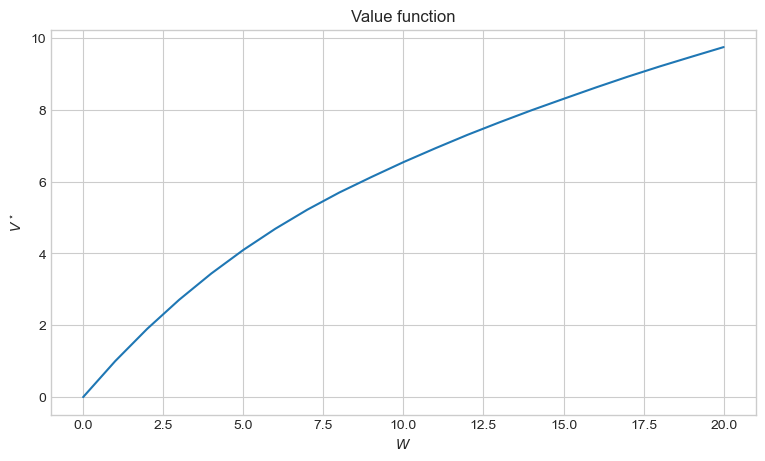

In [59]:
fig = plt.figure(figsize=(20,5))# figsize is in inches...

ax = fig.add_subplot(1,2,1)
ax.plot(np.arange(par.W+1),Vstar)
ax.set_xlabel(f"$W$")
ax.set_ylabel(f"$V^\star$")
ax.set_title(f'Value function')

plt.show()

### 4. For $T=10$, $\beta=0.9$  and $W=20$ compare your solution using backward induction from exercise 1 with VFI. *How do the solutions differ?* 

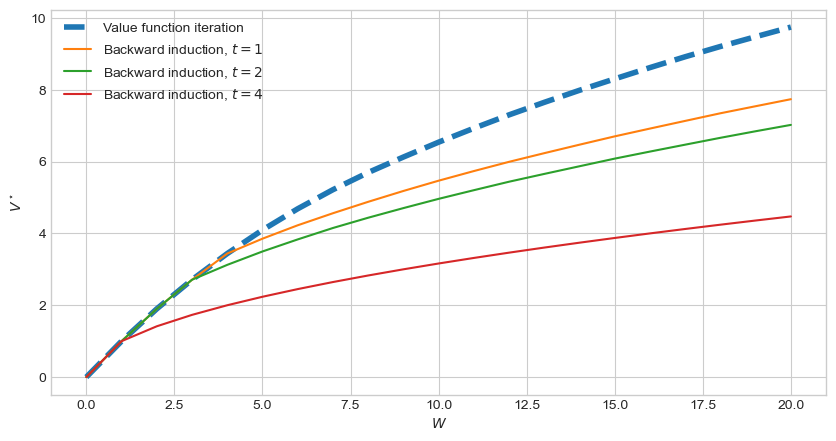

In [21]:
#Add T to par
par.T = 4

#Solve using Backward Induction
_,Vstar_bi = ex1.solve_backwards(beta=par.beta,W=par.W,T=par.T) 

#Make figure
fig = plt.figure(figsize=(10,5))# figsize is in inches...
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(par.W+1),Vstar, label = f'Value function iteration', linestyle = 'dashed', linewidth=4)
for t in [0]+list(range(1,par.T,2)):
    ax.plot(np.arange(par.W+1),Vstar_bi[:,t], label = f'Backward induction, $t = {t+1}$')
ax.legend()
ax.set_xlabel(f"$W$")
ax.set_ylabel(f"$V^\star$")
plt.show()

### 5. Vary $\beta$ and check that the number of periods until convergence is increasing in $\beta$. *What is the reason for this lower convergence?*

In [31]:
beta_vec = [0.3,0.5,0.75, 0.80, 0.85, 0.90,0.93, 0.96, 0.99]
it_vec = np.nan + np.zeros(len(beta_vec))
W = 20

for i,beta in enumerate(beta_vec):
    
    par.beta = beta
    sol = solve_VFI(par)
    it_vec[i] = sol.it


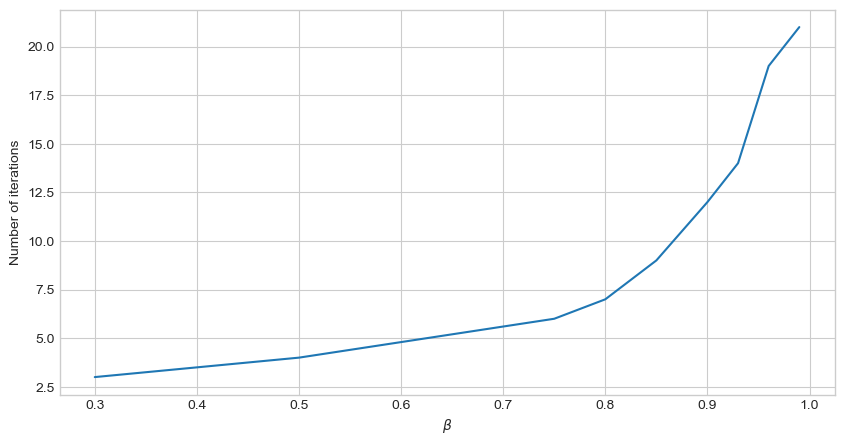

In [32]:
#Make figure
fig = plt.figure(figsize=(10,5))# figsize is in inches...

ax = fig.add_subplot(1,1,1)
ax.plot(beta_vec,it_vec)
ax.set_xlabel(f"$\u03B2$")
ax.set_ylabel("Number of iterations")
plt.show()

### 6. Simulate $C_1$, $C_2$,...,$C_{10}$ using the policy function found in 2) and W=5

In [62]:
#Solve the model using beta=0.90 and W=5
par.beta = 0.90
par.W = 5 #Maximum cake size

sol = solve_VFI(par)
Cstar, Vstar, _ = sol.C, sol.V, sol.it

In [67]:
# define function
def simulate(Cstar,T,W):
    C_vfi = np.empty(T)
    W_now = W
    for t in range(T):
        W_now = int(W_now)   # change the type to integreger 0,1,2,3 and so on
        #Fill in             # Use the solution. Hint: similar to Exercise 1 with Backwards Induction
         
        W_now = W_now-C_vfi[t]
    return C_vfi


# 4. Simulate
W = 10 # initial cake size
T = 10 # number of simulated periods
C_sim = simulate(Cstar,T,W)  # Call function
        
print('Solution for C with T =',T,'and W =', W , ': C =',C_sim)

Solution for C with T = 10 and W = 10 : C = [ 0.1   0.2   0.25  0.5   1.    2.    2.5   5.   10.   20.  ]
